# Introduction to Machine Learning
## Homework 01: Linear Regression

In [7]:
# Importing cPickle, Numpy and Pyplot
import pickle as cp
import numpy as np
import matplotlib.pyplot as plt

# Load wite whine data
X, y = cp.load(open('winequality-white.pickle', 'rb'), encoding='latin1')

# Create the train and test sets
N, D = X.shape

N_train = int(0.8 * N)
N_test = N - N_train

X_train = X[:N_train]
y_train = y[:N_train]

X_test = X[N_train:]
y_test = y[N_train:]

In [8]:
# Making sense of the data
print(N, D)

print(X_train.shape)
print(y_train.shape)

print(X_train[0])
print(y_train[0])

4898 11
(3918, 11)
(3918,)
[  7.60000000e+00   2.40000000e-01   4.40000000e-01   3.80000000e+00
   3.70000000e-02   4.90000000e+01   1.46000000e+02   9.91100000e-01
   3.06000000e+00   3.70000000e-01   1.16000000e+01]
6.0


In [9]:
# Find the unique elements of an array.
unique, counts = np.unique(y_train, return_counts=True)
print(unique)
print(counts)

[ 3.  4.  5.  6.  7.  8.  9.]
[  14  129 1164 1772  692  144    3]


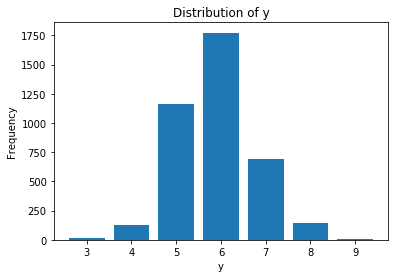

In [10]:
# Creating a bar chart of distribution of y values of the training set
plt.bar(unique, counts, align='center')
plt.title("Distribution of y")
plt.xlabel("y")
plt.ylabel("Frequency")

plt.show()

In [11]:
# Get the average value of y in the training set
y_train_mean = np.mean(y_train)
print("y_train_mean = %.3f" % y_train_mean)

y_train_mean = 5.879


In [14]:
# Taking a closer look at y's

print(y_train)
print(y_train - y_train_mean)
print((y_train - y_train_mean)**2)

[ 6.  5.  6. ...,  6.  6.  5.]
[ 0.12123532 -0.87876468  0.12123532 ...,  0.12123532  0.12123532
 -0.87876468]
[ 0.014698    0.77222736  0.014698   ...,  0.014698    0.014698    0.77222736]


In [15]:
# Define a function returning the Mean Squared Error
def MSE(y_actual, y_predict):
    return np.mean((y_predict - y_actual)**2)

# Get the MSE of train and test data by predicting the average value of y of the training set
sq_error_train = MSE(y_train, y_train_mean)
sq_error_test = MSE(y_test, y_train_mean)

print("By predicting the average value of y from the training set, we get the following MSEs")
print("MSE_train = %.3f" % sq_error_train)
print("MSE_test = %.3f" % sq_error_test)

By predicting the average value of y from the training set, we get the following MSEs
MSE_train = 0.777
MSE_test = 0.814


In [17]:
# Linear Regression Using Least Squares

# First, we need to standartize the training and test sets, so that
# the each feature have zero mean and unit variance
X_train_std = np.ones((N_train, D + 1))
X_test_std = np.ones((N_test, D + 1))

for j in range(0, D):
    avg = np.mean(X_train[:, j]) 
    std = np.std(X_train[:, j]) 
    X_train_std[:,j+1] = (X_train[:,j] - avg) / std
    X_test_std[:,j+1] = (X_test[:,j] - avg) / std
    
# or in a short form 
# X_std = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

In [18]:
# Make sure we standartized the data as expected
print(np.mean(X_train_std[:,0]))
print(np.mean(X_train_std[:,1]))
print(np.mean(X_train_std[:,2]))

print(np.std(X_train_std[:,0]))
print(np.std(X_train_std[:,1]))
print(np.std(X_train_std[:,3]))

1.0
-8.34225774501e-16
-3.80842201403e-17
0.0
1.0
1.0


Let's define a function that fits the Linear Regression model and returnes optimal model parameters. The formulata, as you remember, looks like this:

$$\Huge \mathbf{w} = \Big( \mathbf{X}^\text{T} \mathbf{X} \Big)^{-1} \mathbf{X}^\text{T} y$$

In [19]:
def get_linear_model(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.transpose(X)), y)

In [22]:
# Define a function that outputs the predictions of given input data wrt to a given linear model w
def linear_predict(X, w):
    return np.dot(X, w)

w = get_linear_model(X_train_std, y_train)

print("By using Linear Regression, we get the following MSEs")
print("MSE_train = %.3f" % MSE(y_train, linear_predict(X_train_std, w)))
print("MSE_test = %.3f" % MSE(y_test, linear_predict(X_test_std, w)))

By using Linear Regression, we get the following MSEs
MSE_train = 0.564
MSE_test = 0.561


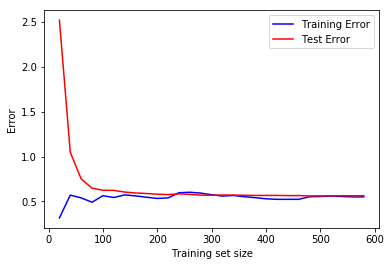

In [23]:
plt.figure()

points = range(20, 600, 20)
error_train = np.zeros(len(points))
error_test = np.zeros(len(points))

# Iterate through the training data size from 20 to 600
for i in range(0, len(points)):
    
    # Get the linear model by using only i training samples and compute the MSEs for training and test sets
    X_train_current = X_train_std[:points[i]]
    y_train_current = y_train[:points[i]]
    
    # Fit the model
    w = get_linear_model(X_train_current, y_train_current)
    
    # Computed the MSEs
    error_train[i] = MSE(linear_predict(X_train_current, w), y_train_current)
    error_test[i] = MSE(linear_predict(X_test_std, w), y_test)

plt.xlabel('Training set size')    
plt.ylabel('Error')    

# Plot the learning curve
plt.plot(points, error_train, 'b', label='Training Error')
plt.plot(points, error_test, 'r', label='Test Error')

plt.legend()
plt.show()

The figure illustrates that the learning algorithm is suffering from a high bias (underfitting). The test error does not improve with the increase of training set size. Therefore, getting more train data will not help much.

# Polynomial Basis Expansion with Ridge and Lasso

In [25]:
# Import the necessary classes

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Set the last 20% of the training set for the purpose of validaiton
N_train_new = int(0.8 * N_train)
N_cv = N_train - N_train_new

X_train_new = X[:N_train_new]
y_train_new = y[:N_train_new]

X_cv = X[N_train_new:N_train]
y_cv = y[N_train_new:N_train]

In [35]:
# Possible values for lambda and degree of the polynomial features
lambda_values = [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
degree_values = [2, 3, 4, 5, 10]

ridgeBestAlpha = 0
ridgeBestDegree = 0
ridgeBestError = -1

for alpha in lambda_values:
    
    for degree in degree_values:
        
        model = Pipeline([('poly', PolynomialFeatures(degree)), ('scale', StandardScaler()), 
                          ('ridge', linear_model.Ridge(alpha = alpha, fit_intercept = True))])
        
        model.fit(X_train_new, y_train_new)
        
        error = MSE(model.predict(X_cv), y_cv)

        if (ridgeBestError == -1 or error < ridgeBestError):
            ridgeBestAlpha = alpha
            ridgeBestDegree = degree
            ridgeBestError = error

print("The optimal values of hyperparameters for Ridge Regression are")
print("Lambda = ", ridgeBestAlpha)
print("Degree = ", ridgeBestDegree)

KeyboardInterrupt: 

In [27]:
import warnings
warnings.filterwarnings("ignore", category=Warning)

lassoBestAlpha = 0
lassoBestDegree = 0
lassoBestError = -1

for alpha in lambda_values:
    
    for degree in degree_values:
                
        model = Pipeline([('poly', PolynomialFeatures(degree = degree)), ('scale', StandardScaler()), 
                          ('lasso', linear_model.Lasso(alpha = alpha, fit_intercept = True))])
        
        model.fit(X_train_new, y_train_new)
        
        error = MSE(model.predict(X_cv), y_cv)

        if (lassoBestError == -1 or error < lassoBestError):
            lassoBestAlpha = alpha
            lassoBestDegree = degree
            lassoBestError = error

print("The optimal values of hyperparameters for Lasso are")
print("Lambda = ", lassoBestAlpha)
print("Degree = ", lassoBestDegree)

The optimal values of hyperparameters for Lasso are
Lambda =  0.001
Degree =  4


In [28]:
# After obtaining the optimal values for lambda and degree for Ridge and Lasso,
# let's train the models using the obtained hyperparameters on the whole training dataset

# Let's start with Ridge
ridgeModel = Pipeline([('poly', PolynomialFeatures(ridgeBestDegree)), ('scale', StandardScaler()), 
                          ('ridge', linear_model.Ridge(alpha = ridgeBestAlpha, fit_intercept = True))])

ridgeModel.fit(X_train, y_train)
ridgeTrain = MSE(ridgeModel.predict(X_train), y_train)
ridgeTest = MSE(ridgeModel.predict(X_test), y_test)

print("By using Ridge with degree = ", ridgeBestDegree, ", lambda = ", ridgeBestAlpha, ", we get the following MSEs")
print("For training set - ", ridgeTrain)
print("For test set - ", ridgeTest)

By using Ridge with degree =  4 , lambda =  10 , we get the following MSEs
For training set -  0.450439081198
For test set -  0.586035132479


In [29]:
# Let's do the same for Lasso
lassoModel = Pipeline([('poly', PolynomialFeatures(lassoBestDegree)), ('scale', StandardScaler()), 
                          ('lasso', linear_model.Lasso(alpha = lassoBestAlpha, fit_intercept = True))])

lassoModel.fit(X_train, y_train)
lassoTrain = MSE(lassoModel.predict(X_train), y_train)
lassoTest = MSE(lassoModel.predict(X_test), y_test)

print("By using Ridge with degree = ", lassoBestDegree, ", lambda = ", lassoBestAlpha, ", we get the following MSEs")
print("For training set - ", lassoTrain)
print("For test set - ", lassoTest)

By using Ridge with degree =  4 , lambda =  0.001 , we get the following MSEs
For training set -  0.476253585967
For test set -  0.533767672614


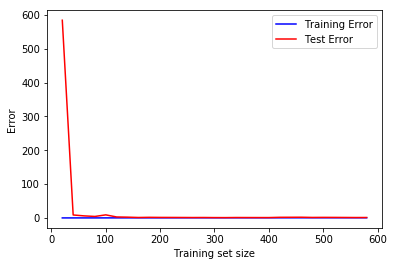

In [34]:
plt.figure()

points = range(20, 600, 20)
error_train = np.zeros(len(points))
error_test = np.zeros(len(points))

# Let's do the same for Lasso
lassoModel = Pipeline([('poly', PolynomialFeatures(lassoBestDegree)), ('scale', StandardScaler()), 
                          ('lasso', linear_model.Lasso(alpha = lassoBestAlpha, fit_intercept = True))])

lassoModel.fit(X_train, y_train)
#lassoTrain = MSE(lassoModel.predict(X_train), y_train)
#lassoTest = MSE(lassoModel.predict(X_test), y_test)

# Iterate through the training data size from 20 to 600
for i in range(0, len(points)):
    
    # Get the linear model by using only i training samples and compute the MSEs for training and test sets
    X_train_current = X_train[:points[i]]
    y_train_current = y_train[:points[i]]
    
    # Fit the model
    lassoModel.fit(X_train_current, y_train_current)
    
    # Computed the MSEs
    error_train[i] = MSE(lassoModel.predict(X_train_current), y_train_current)
    error_test[i] = MSE(lassoModel.predict(X_test), y_test)

plt.xlabel('Training set size')    
plt.ylabel('Error')    

# Plot the learning curve
plt.plot(points, error_train, 'b', label='Training Error')
plt.plot(points, error_test, 'r', label='Test Error')

plt.legend()
plt.show()